## 1) Prepare a classification model using SVM for salary data 

### 1. Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,precision_score,accuracy_score
import seaborn as sns

### 2.Import the data

In [2]:
#Train Data
salary_train_data = pd.read_csv('SalaryData_Train(1).csv')
salary_train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
salary_test_data = pd.read_csv('SalaryData_Test(1).csv')
salary_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### 3.Data Understanding

In [4]:
salary_train_data.shape

(30161, 14)

In [5]:
salary_test_data.shape

(15060, 14)

In [6]:
salary_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


### 4.EDA

In [8]:
salary_train_data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [9]:
salary_train_data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [10]:
salary_train_data['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
salary_train_data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
salary_train_data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
salary_train_data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [14]:
salary_train_data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [15]:
salary_train_data['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [16]:
salary_train_data['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
catogorical_columns=['workclass','Salary','native','sex','race','relationship','occupation','maritalstatus','education']

In [18]:
salary_train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
#convert into catogirical features(Train data)
salary_train_data = pd.get_dummies(salary_train_data,drop_first=True)
salary_train_data

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,39,13,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30157,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
30158,58,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30159,22,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
salary_train_data.dtypes

age                        int64
educationno                int64
capitalgain                int64
capitalloss                int64
hoursperweek               int64
                           ...  
native_ Trinadad&Tobago    uint8
native_ United-States      uint8
native_ Vietnam            uint8
native_ Yugoslavia         uint8
Salary_ >50K               uint8
Length: 95, dtype: object

In [9]:
#convert into catogirical features(Test data)
salary_test_data = pd.get_dummies(salary_test_data,drop_first=True)
salary_test_data

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,25,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,10,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,34,6,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15056,39,13,0,0,36,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15057,38,13,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15058,44,13,5455,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
X_test = salary_test_data.drop(labels = "Salary_ >50K",axis=1)

In [11]:
y_test = salary_test_data[["Salary_ >50K"]]

In [13]:
X = salary_train_data.drop(labels = "Salary_ >50K",axis=1)

In [14]:
y = salary_train_data[["Salary_ >50K"]]

In [15]:
X

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 6.Model Training

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
sv_model = SVC()

In [18]:
sv_model.fit(X,y)

SVC()

### 7.Model Testing

In [19]:
y_test_pred = sv_model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### 8.Model Evalution

In [33]:
sv_model.score(X_test,y_test_pred)

1.0

In [34]:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[10997,   363],
       [ 2703,   997]], dtype=int64)

<AxesSubplot:>

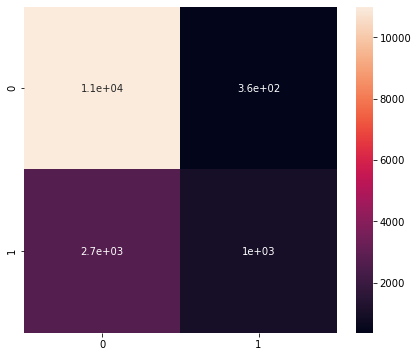

In [35]:
plt.figure(figsize=(7,6))
sns.heatmap(data = cm,annot=True)

In [36]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



In [37]:
accuracy_score(y_test,y_test_pred)

0.7964143426294821

### Tuning Parameters

#### 1. Regularization (C)

In [38]:
model_C = SVC(C=1)
model_C.fit(X, y)
model_C.score(X_test, y_test)

0.7964143426294821

In [39]:
model_C = SVC(C=100)
model_C.fit(X,y)
model_C.score(X_test, y_test)

0.8063745019920319

In [41]:
model_C = SVC(C=50)
model_C.fit(X,y)
model_C.score(X_test, y_test)

0.8064409030544488

#### 2. Gamma

In [42]:
model_g = SVC(gamma='scale')
model_g.fit(X,y)
model_g.score(X_test, y_test)

0.7964143426294821

In [43]:
model_g = SVC(gamma='auto')
model_g.fit(X,y)
model_g.score(X_test, y_test)

0.8624833997343957

#### 3. Kernel

In [ ]:
#{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X,y)

In [90]:
model_linear_kernal.score(X_test, y_test)

0.9801980198019802

### Imporoving the accuracy score after tuning hyperparameters

In [96]:
sv_model = SVC(C=50,gamma='auto',kernel='linear',)

In [97]:
sv_model.fit(X,y)

SVC(C=240, kernel='linear')

In [100]:
y_test_pred = sv_model.predict(X_test)
y_test_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [101]:
accuracy_score(y_test,y_test_pred)

0.9801980198019802